In [4]:
import sympy as sym

In [5]:
sym.init_printing(True)

In [6]:
import numpy as np

In [7]:
from importlib.machinery import SourceFileLoader

main = SourceFileLoader(
    "main", "../src/main.py"
).load_module()

from main import *

In [8]:
import matplotlib.pyplot as plt

In [9]:
from collections import Counter

### Symbols

In [11]:
p_1, p_2, p_3, p_4, p_5, p_6, p_7, p_8, p_9, p_10, p_11, p_12, p_13, p_14, p_15, p_16  = sym.symbols("p_1, p_2, p_3, p_4, p_5, p_6, p_7, p_8, p_9, p_10, p_11, p_12, p_13, p_14, p_15, p_16")

q_1, q_2, q_3, q_4, q_5, q_6, q_7, q_8, q_9, q_10, q_11, q_12, q_13, q_14, q_15, q_16 = sym.symbols("q_1, q_2, q_3, q_4 , q_5, q_6, q_7, q_8, q_9, q_10, q_11, q_12, q_13, q_14, q_15, q_16")

In [12]:
v_3, v_11, v_13, v_5, v_15, v_7 = sym.symbols("v_3, v_11, v_13, v_5, v_15, v_7")
v_12, v_4, v_14, v_6, v_16, v_8 = sym.symbols("v_12, v_4, v_14, v_6, v_16, v_8")

In [13]:
p1, p2, p3, p4 = sym.symbols("p1, p2, p3, p4")

R, S, T, P = sym.symbols("R, S, T, P")


b, c = sym.symbols("b, c")

In [14]:
ss = sym.symbols(f"v_1:{17}")

#### Matrix mem-two

In [11]:
M2 = sym.zeros(16, 16)

col = 0
row = 0

for p, q in [[p_1, q_1], [p_2, q_3], [p_3, q_2], [p_4, q_4]]:
    for i, combo in enumerate([(p * q), ((1 - q) * p), ((1 - p) * q), ((1 - p) * (1 - q))]):

        M2[row, col + i] = combo
        
    col += 4
    row += 1

col = 0

for p, q in [[p_5, q_9], [p_6, q_11], [p_7, q_10], [p_8, q_12]]:
    for i, combo in enumerate([(p * q), ((1 - q) * p), ((1 - p) * q), ((1 - p) * (1 - q))]):

        M2[row, col + i] = combo
        
    col += 4
    row += 1
    
col = 0

for p, q in [[p_9, q_5], [p_10, q_7], [p_11, q_6], [p_12, q_8]]:
    for i, combo in enumerate([(p * q), ((1 - q) * p), ((1 - p) * q), ((1 - p) * (1 - q))]):

        M2[row, col + i] = combo
        
    col += 4
    row += 1
    
col = 0

for p, q in [[p_13, q_13], [p_14, q_15], [p_15, q_14], [p_16, q_16]]:
    for i, combo in enumerate([(p * q), ((1 - q) * p), ((1 - p) * q), ((1 - p) * (1 - q))]):

        M2[row, col + i] = combo
        
    col += 4
    row += 1

In [12]:
m2 = sym.lambdify((p_1, p_2, p_3, p_4, p_5,
                   p_6, p_7, p_8, p_9, p_10,
                   p_11, p_12, p_13, p_14,
                   p_15, p_16, q_1, q_2, q_3, q_4,
                   q_5, q_6, q_7, q_8, q_9, q_10,
                   q_11, q_12, q_13, q_14, q_15, q_16), M2, 'numpy')

### check cooperation condition for special case

In [13]:
np.random.seed(1)

coop_ind = list(np.arange(0, 16, 4)) + list(np.arange(1, 16, 4))
def_ind = list(np.arange(2, 16, 4)) + list(np.arange(3, 16, 4))                                       

for _ in range(1000):
    ps = np.random.random(3)
    qs = np.random.random(3)
    
    pis = np.array([ps[0], ps[1], ps[0], ps[1],
                    ps[1], ps[2], ps[1], ps[2],
                    ps[0], ps[1], ps[0], ps[1],
                    ps[1], ps[2], ps[1], ps[2]])
    qis = np.array([qs[0], qs[1], qs[0], qs[1],
                    qs[1], qs[2], qs[1], qs[2],
                    qs[0], qs[1], qs[0], qs[1],
                    qs[1], qs[2], qs[1], qs[2]])

    x =  [*pis] + [*qis]
    
    ss_num = invariant_distribution(m2(*x))
    
    assert np.isclose(sum([(1 - pis[i]) * ss_num[i] for i in coop_ind]) -
                      sum([(pis[i]) * ss_num[i] for i in def_ind]), 0)

In [14]:
coop_ind

[0, 4, 8, 12, 1, 5, 9, 13]

In [15]:
pis = [p_1, p_2, p_1, p_2, p_2, p_4, p_2, p_4, p_1, p_2, p_1, p_2, p_2, p_4, p_2, p_4]

In [16]:
# sym.init_printing(False)

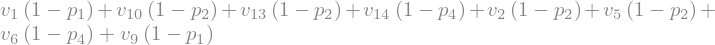

In [17]:
sum([(1 - pis[i]) * ss[i] for i in coop_ind])

In [18]:
sum([(pis[i]) * ss[i] for i in def_ind])

## Numerical Simulations of Equilibria 

### Two bits reactive

In [19]:
import pandas as pd

In [20]:
import glob

In [21]:
columns = (["", "ID"] + [f'p{i+1}' for i in range(16)] + [f'q{i+1}' for i in range(16)] + 
           ['label', 'Sp', 'Sq', "condition A", "condition B",'c', 'b'])

In [22]:
# files = glob.glob("../special_case/*.csv")

# dfs = [pd.read_csv(file, names=columns) for file in files]

# df = pd.concat(dfs)

In [23]:
df = pd.read_csv("../special_case.csv", index_col=0)

In [24]:
df.head()

,Unnamed: 1,ID,p1,p2,p3,p4,p5,p6,p7,p8,...,q14,q15,q16,label,Sp,Sq,condition A,condition B,c,b
0,0,32781,1,0.5378,1,0.5378,0.5378,0.12572,0.5378,0.12572,...,0,0,0,N0,0.6,0.213148,True,True,0.6,0.1
1,1,32781,1,0.5378,1,0.5378,0.5378,0.12572,0.5378,0.12572,...,1,0,1,N1,0.6,0.410954,True,True,0.6,0.1
2,2,32781,1,0.5378,1,0.5378,0.5378,0.12572,0.5378,0.12572,...,0,1,0,N2,0.6,0.424367,True,True,0.6,0.1
3,3,32781,1,0.5378,1,0.5378,0.5378,0.12572,0.5378,0.12572,...,1,1,1,N3,0.6,0.490871,True,True,0.6,0.1
4,4,32781,1,0.5378,1,0.5378,0.5378,0.12572,0.5378,0.12572,...,0,0,0,N4,0.6,0.600000,True,True,0.6,0.1


In [25]:
def seperate_equilibria_and_non(df):
    per_player = df.groupby('ID')['condition A'].all()

    eq_players_ID = per_player[per_player == True].index

    noneq_players_ID = per_player[per_player == False].index
    
    return df[df['ID'].isin(eq_players_ID)], df[df['ID'].isin(noneq_players_ID)]


In [26]:
eq, noneq = seperate_equilibria_and_non(df)

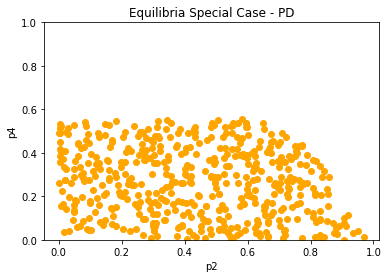

In [27]:
fig, ax = plt.subplots()

ax.set_title("Equilibria Special Case - PD")

for i, row in eq[['p2', 'p6',]].drop_duplicates().sample(n=500, random_state=1).iterrows():

    ax.scatter(row['p2'], row['p6'], color='orange')

ax.set_ylim(0, 1)

ax.set_xlabel('p2')

ax.set_ylabel('p4')

plt.show()

In [28]:
groups = noneq[noneq['condition A'] == False].groupby('ID')

In [29]:
sets, ids = [], []
for i, group in groups:
    sets.append(group['label'].values)
    ids.append(group['ID'].unique())

In [30]:
flat_list = [item for sublist in sets for item in sublist]

In [31]:
counter = Counter(flat_list)

In [32]:
counter

Counter({'N0': 44617, 'N1': 39621, 'N2': 34965, 'N3': 34889})

In [33]:
minus_zeros = [s for s in list(sets) if 'N0' not in s]

In [34]:
minus_twos = [s for s in list(minus_zeros) if 'N2' not in s]

In [35]:
minus_twos[0]

array(['N3'], dtype=object)

In [36]:
set([s[0] for s in minus_zeros if len(s) == 1])

{'N2', 'N3'}

### Conditions based on the three strategies

In [37]:
def payoffs(R, P, dim=4):
    return np.array([R, 0, 1, P] * dim)


def coplayer_payoffs(R, P, dim=4):
    return np.array([R, 1, 0, P] * dim)


def second_to_last_payoffs(R, P, dim=4):
    return np.array([R] * dim + [0] * dim + [1] * dim + [P] * dim)


def second_to_last_coplayer_payoffs(R, P, dim=4):
    return np.array([R] * dim + [1] * dim + [0] * dim + [P] * dim)

In [38]:
Is = np.linspace(0, 1, 50)

In [39]:
Sx = payoffs(R, P, dim=4)

Sy = coplayer_payoffs(R, P, dim=4)

Sx_prime = second_to_last_payoffs(R, P, dim=4)

Sy_prime = second_to_last_coplayer_payoffs(R, P, dim=4)

In [40]:
N0 = [0, 0, 0, 0]
N2 = [0, 1, 1, 0]
N3 = [0, 1, 1, 1]

**N0**

In [41]:
M = transition_matrix([p1, p2, p2, p4], N0,
                      bits=4, analytical=True)


Sx = payoffs(R, P, dim=4)
ssN0 = invariant_distribution_analytically(M)
sy = ssN0 @ Sy

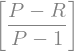

In [42]:
sym.solve((sum(sy).factor() - R), p4)

In [43]:
sy_prime = ssN0 @ Sy_prime

In [44]:
sy_prime[0], sy[0].factor()

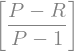

In [45]:
sym.solve((sum(sy_prime).factor() - R), p4)

**N3**

In [46]:
M = transition_matrix([1, p2, p2, p4], N3,
                      bits=4, analytical=True)


ssN3 = invariant_distribution_analytically(M)

In [47]:
sy = ssN3 @ Sy

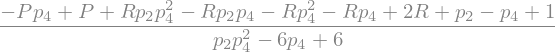

In [48]:
sy[0].factor()

In [49]:
r1 = sym.solve(sy[0].factor().subs({p1:1}) - R, p4)[0]
r2 = sym.solve(sy[0].factor().subs({p1:1}) - R, p4)[1]

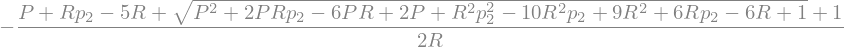

In [50]:
r1.factor()

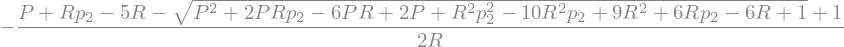

In [51]:
r2.factor()

In [52]:
sy_prime = ssN3 @ Sy_prime

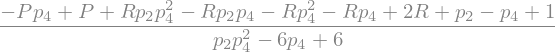

In [53]:
sy_prime[0].factor()

**N2**

In [54]:
M = transition_matrix([1, p2, p2, p4], N2,
                      bits=4, analytical=True)


ssN2 = invariant_distribution_analytically(M)

In [55]:
sy = ssN2 @ Sy

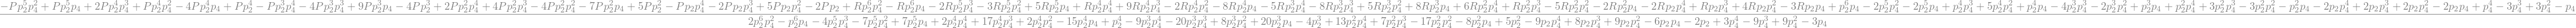

In [56]:
sy[0].factor()

In [57]:
sy_prime = ssN2 @ Sy_prime

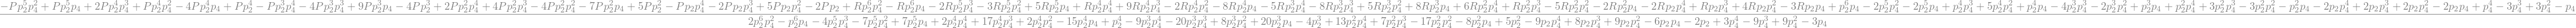

In [58]:
sy_prime[0].factor()

In [59]:
sol_one = sym.solve((sum(ssN0 @ Sy).factor() - R), p4)[0]
sol_two = sym.solve((sum(ssN3 @ Sy).factor() - R), p4)[0]

In [60]:
expr = (sum(ssN2 @ Sy).factor() - R).subs({p1:1}).factor()

In [61]:
# sols_three = sym.solve(expr.subs({P: 0.1, R:0.6}).simplify(), p4)

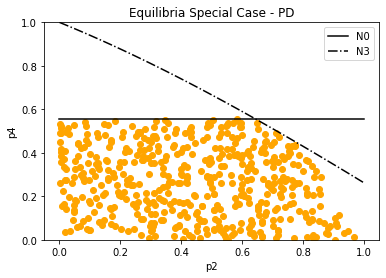

In [62]:
fig, ax = plt.subplots()

ax.set_title("Equilibria Special Case - PD")

for i, row in eq[['p2', 'p6',]].drop_duplicates().sample(n=500, random_state=1).iterrows():

    ax.scatter(row['p2'], row['p6'], color='orange')
    
    
ax.plot(Is, [sol_one.subs({P:0.1, R:0.6}) for _ in Is], '-', label='N0', color='black')

ax.plot(Is, [sol_two.subs({P:0.1, R:0.6, p2:i}) for i in Is], '-.', label='N3', color='black')



ax.set_ylim(0, 1)

ax.set_xlabel('p2')

ax.set_ylabel('p4')

ax.legend()

plt.show()

### The non zero states

In [63]:
[(i + 1) for i, s in enumerate(ssN0) if s != 0 ]

In [64]:
[(i + 1) for i, s in enumerate(ssN3) if s != 0 ]

In [65]:
[(i + 1) for i, s in enumerate(ssN2) if s != 0 ]

### remind myself with memory-one strategies are the relationships from the strategies linear?

In [66]:
df = pd.read_csv("../memory_one_equilibria.csv")

In [67]:
per_player = df.groupby('ID')['condition A'].all()

In [68]:
no_eq_players_ID = per_player[per_player == False].index

In [69]:
no_eq_df = df[df['ID'].isin(no_eq_players_ID)]

In [70]:
groups = no_eq_df[no_eq_df['condition B'] == False].groupby('ID')

In [71]:
sets = []
ids = []
for i, group in groups:
    sets.append(group['label'].values)
    ids.append(group['ID'].unique())

In [72]:
flat_list = [item for sublist in sets for item in sublist]

In [73]:
counter = Counter(flat_list)

In [74]:
N7_indices = [i for i, s in enumerate(sets) if "N7" in list(s)]

N0_indices = [i for i, s in enumerate(sets) if "N0" in list(s)]

In [75]:
len(set(N7_indices + N0_indices)) == len(no_eq_players_ID)

True

In [76]:
deterministic_strategies = list( 
    itertools.product([0, 1], repeat=4)
)

In [77]:
Sy = coplayer_payoffs(R, P, dim=1)

In [78]:
deterministic_strategies[0]

In [79]:
M = calculate_M([p1, p2, p3, p4], deterministic_strategies[0])

ss = invariant_distribution_analytically(M)

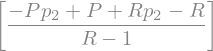

In [80]:
sym.solve(sum(ss @ Sy) - R, p4)

In [81]:
M = calculate_M([p1, p2, p3, p4], deterministic_strategies[7])

ss = invariant_distribution_analytically(M)

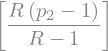

In [82]:
sym.solve(sum(ss @ Sy).subs({p1:1}) - R, p3)

### Donation Game

In [83]:
import numpy as np

In [84]:
df = pd.read_csv("../special_case_donation.csv")

In [85]:
eq_donation, noneq_donation = seperate_equilibria_and_non(df)

In [86]:
Is = np.linspace(0, 1, 10)

In [87]:
b_val = 2
c_val = 1

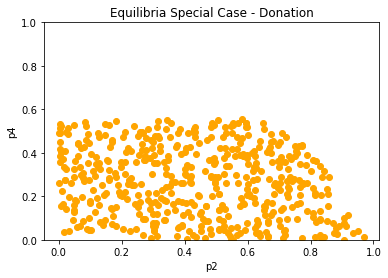

In [88]:
fig, ax = plt.subplots()

ax.set_title("Equilibria Special Case - Donation")

for i, row in eq[['p2', 'p6',]].drop_duplicates().sample(n=500, random_state=1).iterrows():

    ax.scatter(row['p2'], row['p6'], color='orange')

ax.set_ylim(0, 1)
ax.set_xlabel('p2')
ax.set_ylabel('p4')

plt.show()

In [94]:
def payoffs_donation(b, c, dim=4):
    return np.array([b - c, b, -c, 0] * dim)

def second_to_last_payoffs_donation(b, c, dim=4):
    return np.array([b - c] * dim + [b] * dim + [-c] * dim + [0] * dim)

In [95]:
def payoffs_donation_player(b, c, dim=4):
    return np.array([b - c, -c, b, 0] * dim)


def second_to_last_payoffs_donation_player(b, c, dim=4):
    return np.array([b - c] * dim + [-c] * dim + [b] * dim + [0] * dim)

### N0

In [96]:
Sy = payoffs_donation(b, c, dim=4)

Sy_prime = second_to_last_payoffs_donation(b, c, dim=4)

In [97]:
sy = ssN0 @ Sy

In [98]:
(sum(sy).factor() - (b - c))

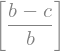

In [99]:
sym.solve((sum(sy).factor() - (b - c)), p4)

In [100]:
sy_prime = ssN0 @ Sy_prime

In [101]:
(sum(sy_prime).factor() - (b - c))

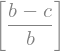

In [102]:
sym.solve((sum(sy_prime).factor() - (b - c)), p4)

### N3

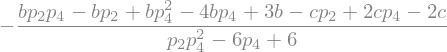

In [103]:
(sum(ssN3 @ Sy).factor() - (b - c)).subs({p1: 1}).factor()

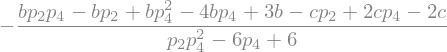

In [104]:
(sum(ssN3 @ Sy_prime).factor() - (b - c)).subs({p1: 1}).factor()

In [105]:
sols = sym.solve((sum(ssN3 @ Sy).factor() - (b - c)).subs({p1: 1}).factor(), p4)

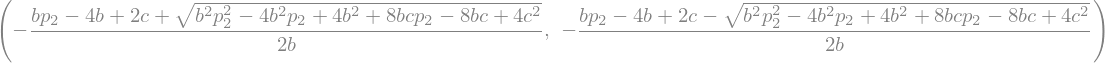

In [106]:
sols[0].factor(), sols[1].factor()

In [107]:
[sols[0].factor().subs({b: b_val, c: c_val}).factor().subs({p2: i}) for i in Is]

In [108]:
[sols[1].factor().subs({b: b_val, c: c_val}).factor().subs({p2: i}) for i in Is]

### N2

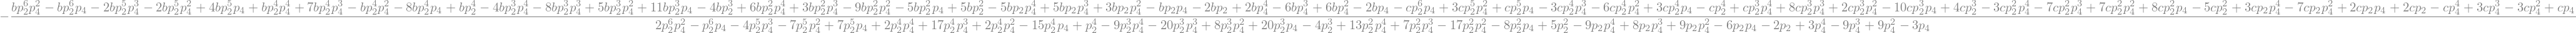

In [109]:
(sum(ssN2 @ Sy).subs({p1: 1}).factor() - (b - c)).factor()

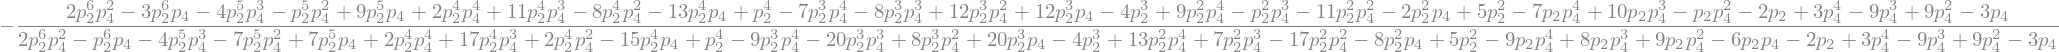

In [110]:
(sum(ssN2 @ Sy).subs({p1: 1}).factor() - (b - c)).subs({c: c_val, b: b_val}).factor()

In [111]:
sol_one_donation = sym.solve((sum(sy).factor() - (b - c)), p4)[0]

In [112]:
sol_two_donation = sols[0]

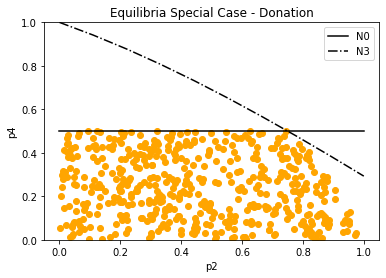

In [113]:
fig, ax = plt.subplots()

ax.set_title("Equilibria Special Case - Donation")

for i, row in eq_donation[['p2', 'p6',]].drop_duplicates().sample(n=500, random_state=1).iterrows():

    ax.scatter(row['p2'], row['p6'], color='orange')
    
    
ax.plot(Is, [sol_one_donation.subs({b:b_val, c:c_val}) for _ in Is], '-', label='N0', color='black')

ax.plot(Is, [sol_two_donation.subs({b:b_val, c:c_val, p2:i}) for i in Is], '-.', label='N3', color='black')


ax.set_ylim(0, 1)

ax.set_xlabel('p2')

ax.set_ylabel('p4')

ax.legend()

plt.show()

### Conditions

In [15]:
ss = sym.symbols(f"v_1:{17}")

In [16]:
v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16 = ss

In [17]:
def ss_sums_to_one(ss):
    """
    """
    return sum(ss)- 1

In [18]:
def akin_relationship(ss, pis):
    """
    """
    coop_ind = list(np.arange(0, 16, 4)) + list(np.arange(1, 16, 4))
    def_ind = list(np.arange(2, 16, 4)) + list(np.arange(3, 16, 4))
    
    return (sum([(1 - pis[i]) * ss[i] for i in coop_ind]) - sum([(pis[i]) * ss[i] for i in def_ind]))

In [19]:
def last_payoffs(ss, c=c, b=b, p=[p1, p2, p4]):
    
    v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16 = ss
    p1, p2, p4 = p
    
    expr = ((v3 + v4 + v11 + v12) * (b * (p2 - 1) + c) + (v7 + v15) * (b * (p2 - 1) + c * p2) 
            + (v13 + v5) * (c * (p2 - 1)) + (v6 + v14) * ((c * (p4 - p2))) +
            (v8 + v16) * (((b - c) * (p2 - 1) + c * p4)))
    
    return expr
    

In [20]:
def second_to_last_payoff(ss, c=c, b=b, p=[p1, p2, p4]):

    v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16 = ss
    p1, p2, p4 = p
    
    expr = ((v13 + v5) * (-c * (-1 + p2)  + b - p2 * b) + (v14 + v8) * (-c * (-1 + p2) - p4 * b) 
            + b * ((-2 + p2) * v11) + b * ((v2 + v6) - p2 * (v2 + v4 + v7)) 
            - b * ((v15 + v16 + v3 + v9 + v12) + p4 * (v16 + v6) - p2 * (v14 + v16 + v9)) 
            + (v15 + v16 + v6 + v7) * (-c * (-1 + p2)))
    return expr
    

In [21]:
# a = (ss @ payoffs_donation_player(b, c) - ss @ payoffs_donation(b, c)).simplify().collect(b - c)

In [22]:
def payoff_difference(ss, c=c, b=b):
    v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16 = ss
    
    return (b + c) * ((v3 + v7+ v11 + v15) - (v2 + v6 + v10 + v14))

In [23]:
pis = [p1, p2, p1, p2, p2, p4, p2, p4, p1, p2, p1, p2, p2, p4, p2, p4]

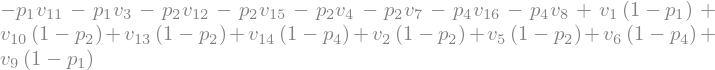

In [24]:
akin_relationship(ss, pis)

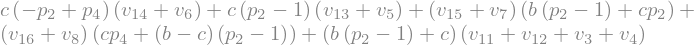

In [25]:
last_payoffs(ss)

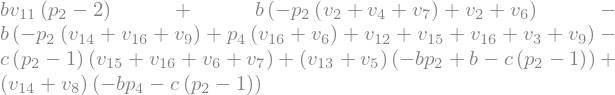

In [26]:
second_to_last_payoff(ss, c=c, b=b, p=[p1, p2, p4])

### The condition

In [27]:
last_payoffs(ssN0).factor()

NameError: name 'ssN0' is not defined

In [28]:
[(i + 1) for i, s in enumerate(ssN0) if s != 0]

NameError: name 'ssN0' is not defined

In [29]:
A = (b * (p2 - 1) + c)

B = (b * (p2 - 1) + c * p2) 

C = (c * (p2 - 1)) 

D = ((c * (p4 - p2)))

E = (((b - c) * (p2 - 1) + c * p4))

In [30]:
expr = (v3 + v4 + v11 + v12) * A + (v7 + v15) * B + (v13 + v5) * C + (v6 + v14) * D + (v8 + v16) * E

In [31]:
(last_payoffs(ss) - expr).expand()

What we know: 

- $C < B < A$ and $C, B, A \neq 0$
- $D$ can be anything
- $E$ can be anything

What we want to show:
    
$$A (v3 + v4 + v11 + v12) + B (v7 + v15) + C (v13 + v5) \geq (- D) (v6 + v14) + (- E)  (v8 + v16)$$

#### Case 1: $A, B, E, D < 0$

The the condition holds only if $v3, v4, v5, v6, v7, v8, v11, v12, v13, v14, v15, v16 = 0 $

In [35]:
case_one = [v1, v2, 0, 0, 0, v6, 0, 0, v9, v10, 0, 0, 0, v14, 0, 0]

In [36]:
ss_sums_to_one(case_one)

In [37]:
akin_relationship(case_one, pis).subs({p_1: 1})

In [148]:
[sym.solve(E, p4)[0].subs({b:2, c:1, p2: i}) for i in Is]

In [149]:
sym.solve(D, p4)

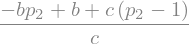

In [150]:
sym.solve(E, p4)[0]

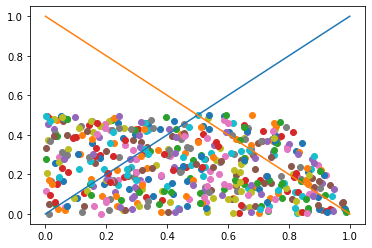

In [152]:
fig, ax = plt.subplots()

ax.plot(Is, [i for i in Is]);

ax.plot(Is, [sym.solve(E, p4)[0].subs({b:2, c:1, p2: i}) for i in Is]);


for i, row in eq_donation[['p2', 'p6',]].drop_duplicates()[2000:2500].iterrows():

    ax.scatter(row['p2'], row['p6'])

In [153]:
sym.solve(D, p2)

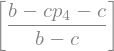

In [154]:
sym.solve(E, p2)

#### Case 2: $A, B, E < 0$ and $D = 0$

The $p2 = p4$


The the condition holds only if $v3, v4, v5, v7, v8, v11, v12, v13, v15, v16 = 0 $

In [155]:
E.subs({p4: p2}).factor()

In [156]:
case_two = [v1, v2, 0, 0, 0, v6, 0, 0, v9, v10, 0, 0, 0, v14, 0, 0]

In [157]:
ss_sums_to_one(case_two)

In [158]:
akin_relationship(case_two, pis).subs({p4:p2})

#### Case 3: $A, B, D < 0$ and $E = 0$


The the condition holds only if $v3, v4, v5, v6, v7, v11, v12, v13, v14, v15 = 0 $

In [159]:
case_three = [v1, v2, 0, 0, 0, 0, 0, v8, v9, v10, 0, 0, 0, 0, 0, v16]

In [160]:
payoff_difference(case_three)

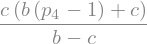

In [161]:
D.subs({p2: sym.solve(E, p2)[0]}).factor().collect(b)

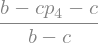

In [162]:
sym.solve(E, p2)[0]

In [163]:
akin_relationship(case_three, pis).subs({p_1: 1})

In [164]:
ss_sums_to_one(case_three)

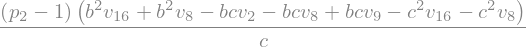

In [165]:
second_to_last_payoff(case_three).subs({p4: sym.solve(E, p4)[0]}).factor()

In [166]:
[(i + 1) for i, s in enumerate(ssN0) if s != 0]

In [167]:
ssN3 = [s.factor().subs({p1:1}).factor() for s in ssN3]

In [168]:
[(i + 1) for i, s in enumerate(ssN3) if s != 0]

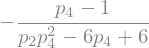

In [169]:
ssN3[7]

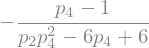

In [170]:
ssN3[1]

In [171]:
0.5 * 0 + 0.5 * 1

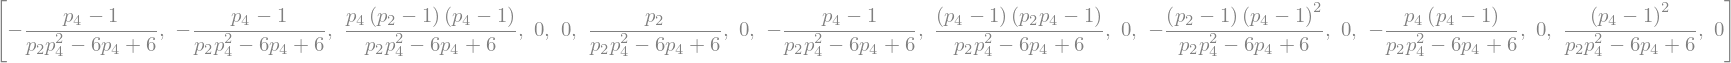

In [172]:
ssN3

#### Case 4: $A, B < 0$ and $D, E > 0$

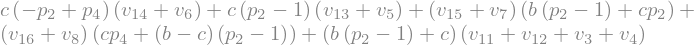

In [173]:
(v3 + v4 + v11 + v12) * A + (v7 + v15) * B + (v13 + v5) * C + (v6 + v14) * D + (v8 + v16) * E

In [174]:
[v1, v2, 0, 0, 0, v6, 0, v8, v9, v10, 0, 0, 0, v14, 0, v16]

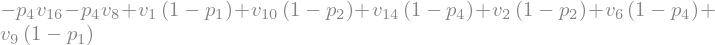

In [175]:
akin_relationship([v1, v2, 0, 0, 0, v6, 0, v8, v9, v10, 0, 0, 0, v14, 0, v16], pis).subs({p_1:1})

In [176]:
sym.solve(D, p2)[0].subs({p4: x[0]})

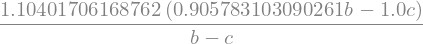

In [177]:
sym.solve(E, p2)[0].subs({p4: x[0]}).factor()

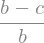

In [178]:
x = sym.solve(sym.solve(D, p2)[0] - sym.solve(E, p2)[0], p4)
x[0]

In [179]:
case_four = akin_relationship([v1, v2, 0, 0, 
                               0, v6, 0, v8, 
                               v9, v10, 0, 0,
                               0, v14, 0, v16], pis).subs({p_1:1, p_4:x[0], p_2:x[0]}).factor().collect(b).collect(c)

In [180]:
[i + 1 for i, s in enumerate(ssN0) if s !=0]

In [181]:
case_four.subs({ss[5]: ssN0[5], ss[7]: ssN0[7], ss[13]: ssN0[13], 
                ss[15]: ssN0[15]}).factor().collect(b).collect(c)

In [182]:
Sx = payoffs_donation_player(b, c)

In [183]:
(ss @ Sy - ss @ Sx).collect(b).collect(c).factor()

In [184]:
((ss @ Sy + ss @ Sx) - 2 * (b - c) * (ss[0] + ss[4] + ss[8] + ss[12])).factor()

In [185]:
def payoffs(R, P, T=1, S=0, dim=4):
    return np.array([R, S, T, P] * dim)


def coplayer_payoffs(R, P, T=1, S=0, dim=4):
    return np.array([R, T, S, P] * dim)


def second_to_last_payoffs(R, P, T=1, S=0, dim=4):
    return np.array([R] * dim + [S] * dim + [T] * dim + [P] * dim)


def second_to_last_coplayer_payoffs(R, P, T=1, S=0, dim=4):
    return np.array([R] * dim + [T] * dim + [S] * dim + [P] * dim)

In [186]:
Sy = coplayer_payoffs(R, P, T, S)
Sx = payoffs(R, P, T, S)

In [187]:
Sy, Sx

(array([R, T, S, P, R, T, S, P, R, T, S, P, R, T, S, P], dtype=object),
 array([R, S, T, P, R, S, T, P, R, S, T, P, R, S, T, P], dtype=object))

In [188]:
expr = (ss @ Sy - ss @ Sx).collect(S).collect(T).factor()
expr

In [189]:
(expr - (T - S) * (v10 - v11 + v14 - v15 + v2 - v3 + v6 - v7)).expand()

In [190]:
Sy_prime = second_to_last_coplayer_payoffs(R, P, T, S)
Sx_prime = second_to_last_payoffs(R, P, T, S)

In [191]:
Sy_prime, Sx_prime

(array([R, R, R, R, T, T, T, T, S, S, S, S, P, P, P, P], dtype=object),
 array([R, R, R, R, S, S, S, S, T, T, T, T, P, P, P, P], dtype=object))

In [22]:
c, b = 1, 3

In [23]:
ps = np.linspace(0, 1, 10)

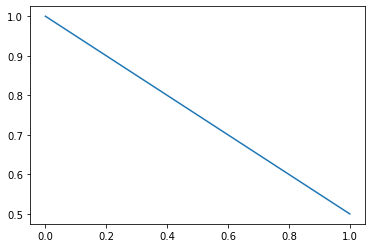

In [25]:
plt.plot(ps, [1 - ((c * i) / (b - c)) for i in ps])